## Introduction
Cancer is one of the most common diseases all around the world that takes the lives of many people every year. Among all types of cancer, breast cancer has become frequent among women and it causes the death of many of them. According to [here](https://canceratlas.cancer.org/the-burden/breast-cancer/), in 140 out of 184 major countries in the world, this type of cancer has been diagnosed more than other types of cancers, and in 101 major countries, this is the most common cause of cancer death. Although breast cancer is the most prevailing type of cancer responsible for a large number of deaths every year, if it is diagnosed in an early stage, it can be cured.

Machine Learning (ML) is a subfield of Artificial Intelligence (AI) in which we use algorithms and computational statistics and let the machines and computers learn automatically from data without explicitly programming. For example, rather than writing many codes to detect a dog or cat with lots of if-else and loops commands, we provide a sufficient number of dog and cat pictures along with their labels and let the machine learn how to identify them in a picture. In the past, due to the lack of data and computation power of computers, it was not possible to do so. However, in recent years, with the growth of technology, lots of data is produced and computer computation power is improved so much. 

With lots of medical data and powerful tools to train an ML model, some started using ML and data analytics tools in the healthcare industry. One of the interesting subjects in analyzing medical data is the diagnosis of cancer from medical images. 

Nevertheless, some models require a great amount of time to be trained and cannot be used in the real world due to its complexity. Lots of researches have been conducted by many people to introduce a better, faster, and more comprehensive way to analyze the data and extract useful information. Nonetheless, high dimensional data is a problem for most of the data mining algorithms, and data dimension reduction is needed to improve the speed of the training. **Although this dataset is relatively small and it is not needed to use dimension reduction techniques, we are going to use Principal Component Analysis (PCA) in this notebook just for practice.******

Breast Cancer Wisconsin (Diagnosis) is a well-known dataset in healthcare on which lots of research has been conducted. This dataset consists of features that are extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the cell nuclei features present in the image. These features are as follows: (1) radius, (2) texture, (3) perimeter, (4) area, (5) smoothness, (6) compactness, (7) concavity, (8) concave points, (9) symmetry, and (10) fractal dimension.
Each feature has three more information, namely mean, standard error, and worst which is the mean of the three larges values. Therefore, the dataset includes 30 tumor features extracted from an FNA image, a patient ID, and a response variable.

This data is taken from the UCI repository and includes 569 observations, 212 Malignant, and 357 Benign.

## Contents
* [Import Libraries](#1)
* [Preprocessing Introduction](#2)
* [Summary Statistics](#3)
* [Box Plots](#4)
* [Outliers](#5)
* [Pair Plot](#6)
* [Correlation Matrix](#7)
* [Multicollinearity Problem](#8)
* [Label Encoding](#9)
* [PCA](#10)
* [Training Predictive Models](#11)
* [Logistic Regression](#12)
* [Random Forest](#13)
* [ANN](#14) 
* [Max Voting](#15) 
* [Results](#16) 

<a id="1"></a> <br>
## Import Libraries
First, we import the required libraries and import the dataset.

In [1]:
# 1-Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns
from scipy.stats import beta
from scipy.stats import f
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# 2-Import Data
# description --> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv') 

<a id="2"></a> <br>
## Preprocessing Introduction
The first step is to preprocess the data. Commonly, there are below steps in data preprocessing in ML:
1. Taking care of missing values
2. Taking care of outliers
3. Taking care of duplicate values
4. Feature aggregation
5. Encoding categorical data
6. Splitting the dataset into train and test set
7. Dimensionality reduction
8. Feature scaling

Based on what we have, there is no need to do step 4, but the rest is required and will be discussed step-by-step. First, we take a look at the first 6 rows of the data. 

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As it is clear, the last column consists of NaN values. To check whether there are more missing values in other attributes as well as how many missing values exist in the last columns, we can use **info** method in pandas.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As it is shown, the last column consists of missing values, and it is needed to be delated. We also split attributes from the label and save them in two different variables.

In [5]:
data = data.iloc[:, 1:-1]

variables = data.iloc[:, 1:]
labels = data.iloc[:, 0]

<a id="3"></a> <br>
## Summary Statistics
The below code shows a table consists of important statistics to know the data better. 

In [6]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


When we take look at the std values, we realize that the std values for some features are high (like area_mean). This may be a sign of existing outliers. To check this observation, we can look at the boxplot of each attribute. For illustration purposes, the boxplots of 10 attributes are displayed. If you want to take a look at the box plot for all of the attributes, just place **data** instead of **data_visualization**.

In [7]:
# For illustration purposes
data_visualization = data.iloc[:, [0, 1, 2, 3, 4, 14, 21, 22, 23, 24]]

<a id="4"></a> <br>
## Box Plots

[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'area_se'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'area_worst')]

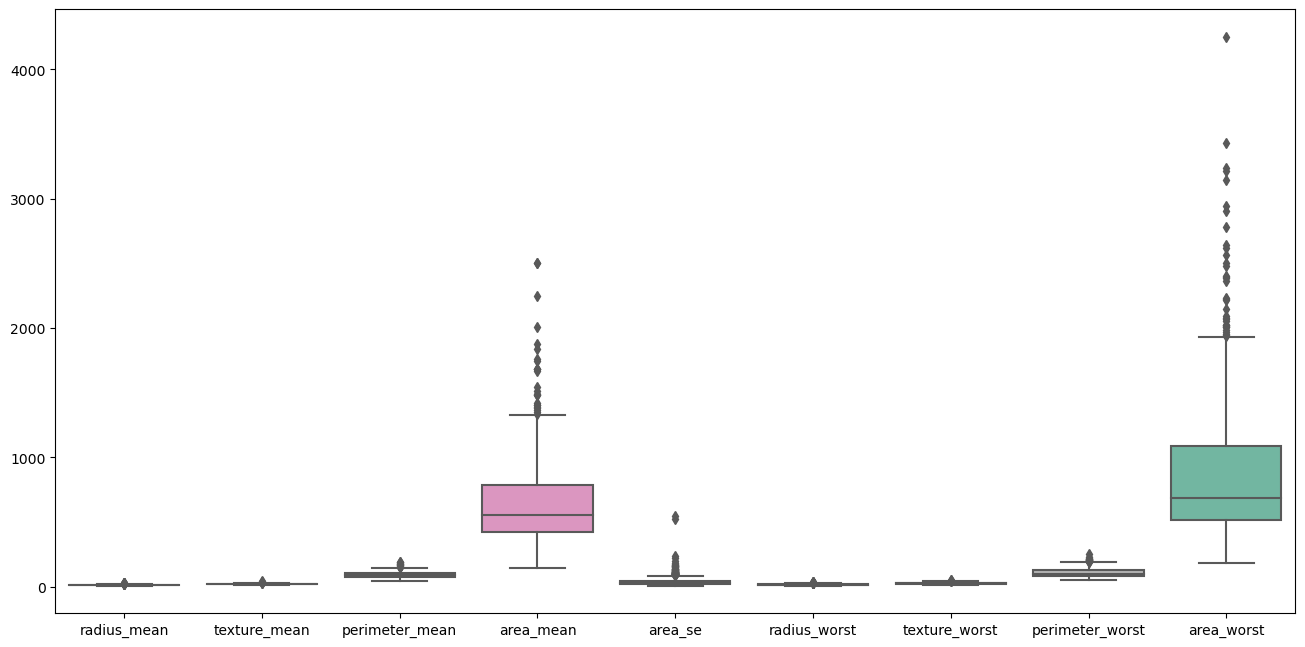

In [8]:
# Visualisation of the data using a box plot
fig=plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(data=data_visualization, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

<a id="5"></a> <br>
## Outliers
This plot shows that there are outliers in some of the features that we need to take care of them (take a look at the area_mean box plot and recall its std). There are two frequently used methods to detect outliers: 1) Interquartile Range(IQR) Method and 2)Z Score method. We are going to use the first method here, but more information on the second method can be found in [here](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02). IQR method makes an acceptable range for data points value and considers those points that fall outside this range as outliers. The formula for this range is calculated as below:

\begin{equation}
IQR = Q3 - Q1 \\
UW = Q3 + 1.5 * IQR \\
LW = Q1 - 1.5 * IQR \\
\end{equation}

where $Q3$, $Q1$, $UW$, and $LW$ are the third quantile, the first quantile, upper whisker, and lower whisker which are the acceptable upper and lower limits, respectively. I like to call the points above the upper whisker as the upper outliers and the points below the lower whisker as lower outliers from now on.
![](https://miro.medium.com/max/520/1*SNZCse_n6-hau15Gn01RLA.png)

The below code detects the outliers in each attribute.

In [9]:
# outlier detection
Q1 = variables.quantile(0.25)
Q3 = variables.quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:')
print(Lower_Whisker)
print('\n\n\nUpperWhisker:')
print(Upper_Whisker)

Lower_outliers = variables < Lower_Whisker
Upper_outliers = variables > Upper_Whisker

Lower_outliers_index = Lower_outliers.any(axis=1)
Upper_outliers_index = Upper_outliers.any(axis=1)

Lower Whisker:
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000704
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.072500
compactness_worst           -0.1406

In [10]:
print(f'There are {sum(Lower_outliers_index)} points below the lower whisker')
print(f'There are {sum(Upper_outliers_index)} points above the upper whisker')

There are 3 points below the lower whisker
There are 170 points above the upper whisker


Another way of indicating the presence of outliers in the data is the **skewness** value which explains the extent to which the data is normally distributed. This value should normally fall in [-1, +1] range. Any major derivation from the upper limit (+1) shows a right-skewed distribution as well as the presence of the upper outliers, and any major derivation from the lower limit (-1) shows a left-skewed distribution as well as the presence of the lower outliers. For example, as the boxplot shows, upper outliers exist in the area_se attribute and its skewness value is way above 1.

In [11]:
variables.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

There are different ways to deal with outliers after detecting them. One of the efficient ways is to change the values of the outliers by the median. The below code does this.

In [12]:
median = variables.median()
variables = variables.where((variables >= Lower_Whisker) & (variables <= Upper_Whisker), median, axis=1)

After replacing outliers with the median, we can take a look at the skewness value of each attribute. We can see now that most of the attributes have a skewness value between 1 and -1.  

In [13]:
variables.skew()

radius_mean                0.624653
texture_mean               0.364262
perimeter_mean             0.661643
area_mean                  1.007852
smoothness_mean            0.192048
compactness_mean           0.754584
concavity_mean             0.963532
concave points_mean        0.946469
symmetry_mean              0.250435
fractal_dimension_mean     0.579465
radius_se                  1.122414
texture_se                 0.568195
perimeter_se               1.052149
area_se                    1.580961
smoothness_se              0.616878
compactness_se             0.924296
concavity_se               0.804049
concave points_se          0.320325
symmetry_se                0.770571
fractal_dimension_se       0.877862
radius_worst               0.820337
texture_worst              0.290453
perimeter_worst            0.840099
area_worst                 1.183372
smoothness_worst           0.182449
compactness_worst          0.828786
concavity_worst            0.739678
concave points_worst       0

<a id="6"></a> <br>
## Pair Plot
One of the best plots to check the relationships between attributes and their distributions is pair plot. The below code shows the pair plot filtered by labels which are diagnoses.

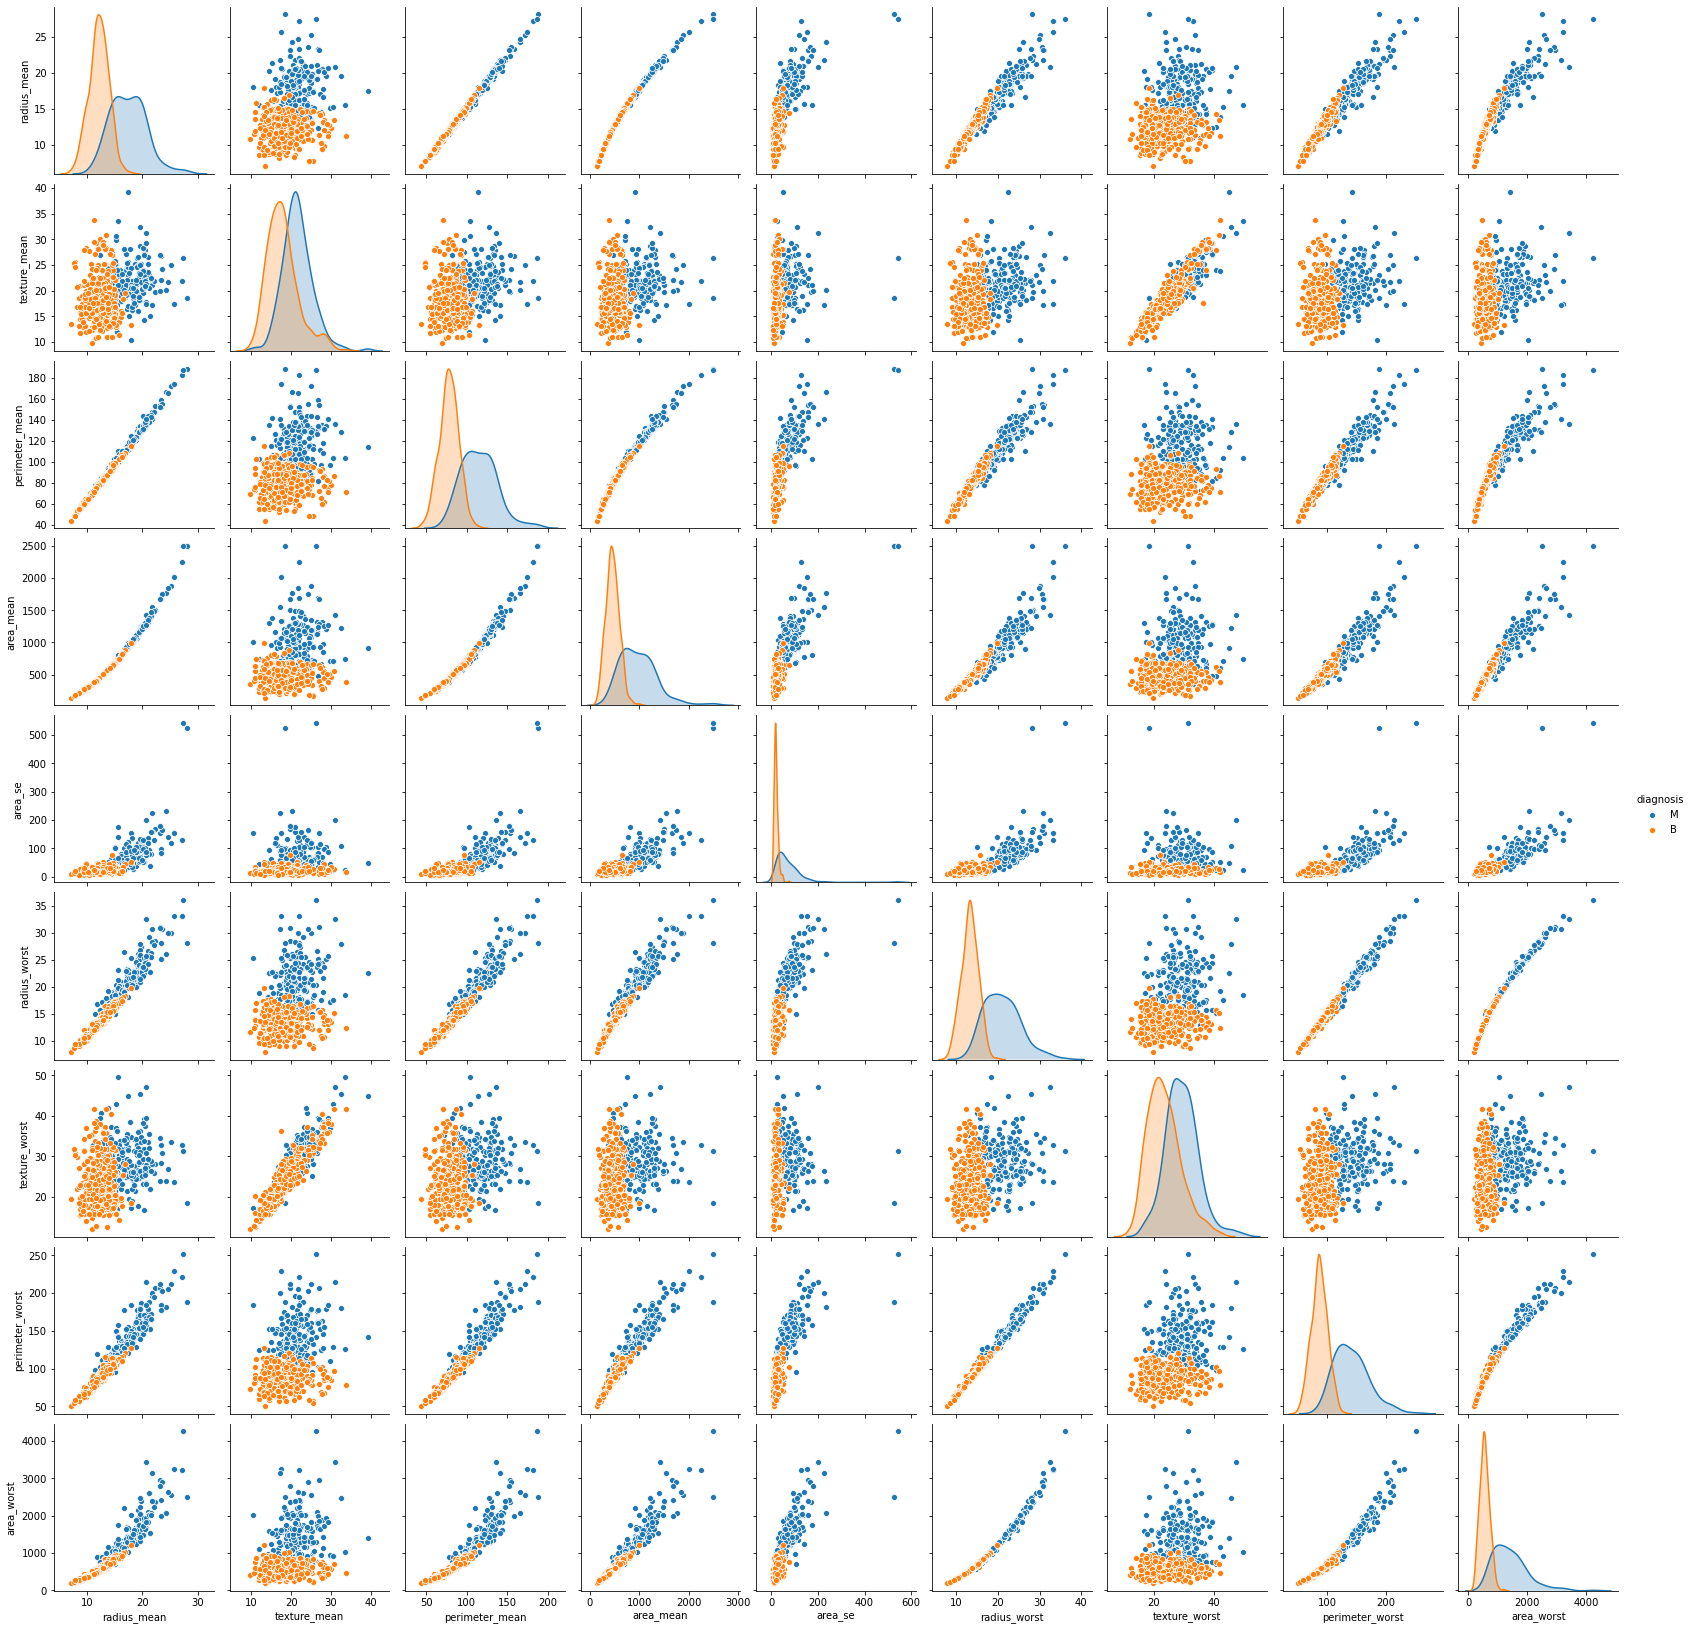

In [14]:
# Pair plot
sns.pairplot(data_visualization, hue='diagnosis')

<a id="7"></a> <br>
## Correlation Matrix
As it is clear, there are linear relationships among some of the attributes. This may cause a problem called the multicollinearity issue. To check whether this problem exists or not, we can always check the correlation among attributes. The below code shows the correlation matrix. Pearson method is used to calculate the correlation.

Text(0.5, 1.0, 'Correlation matrix')

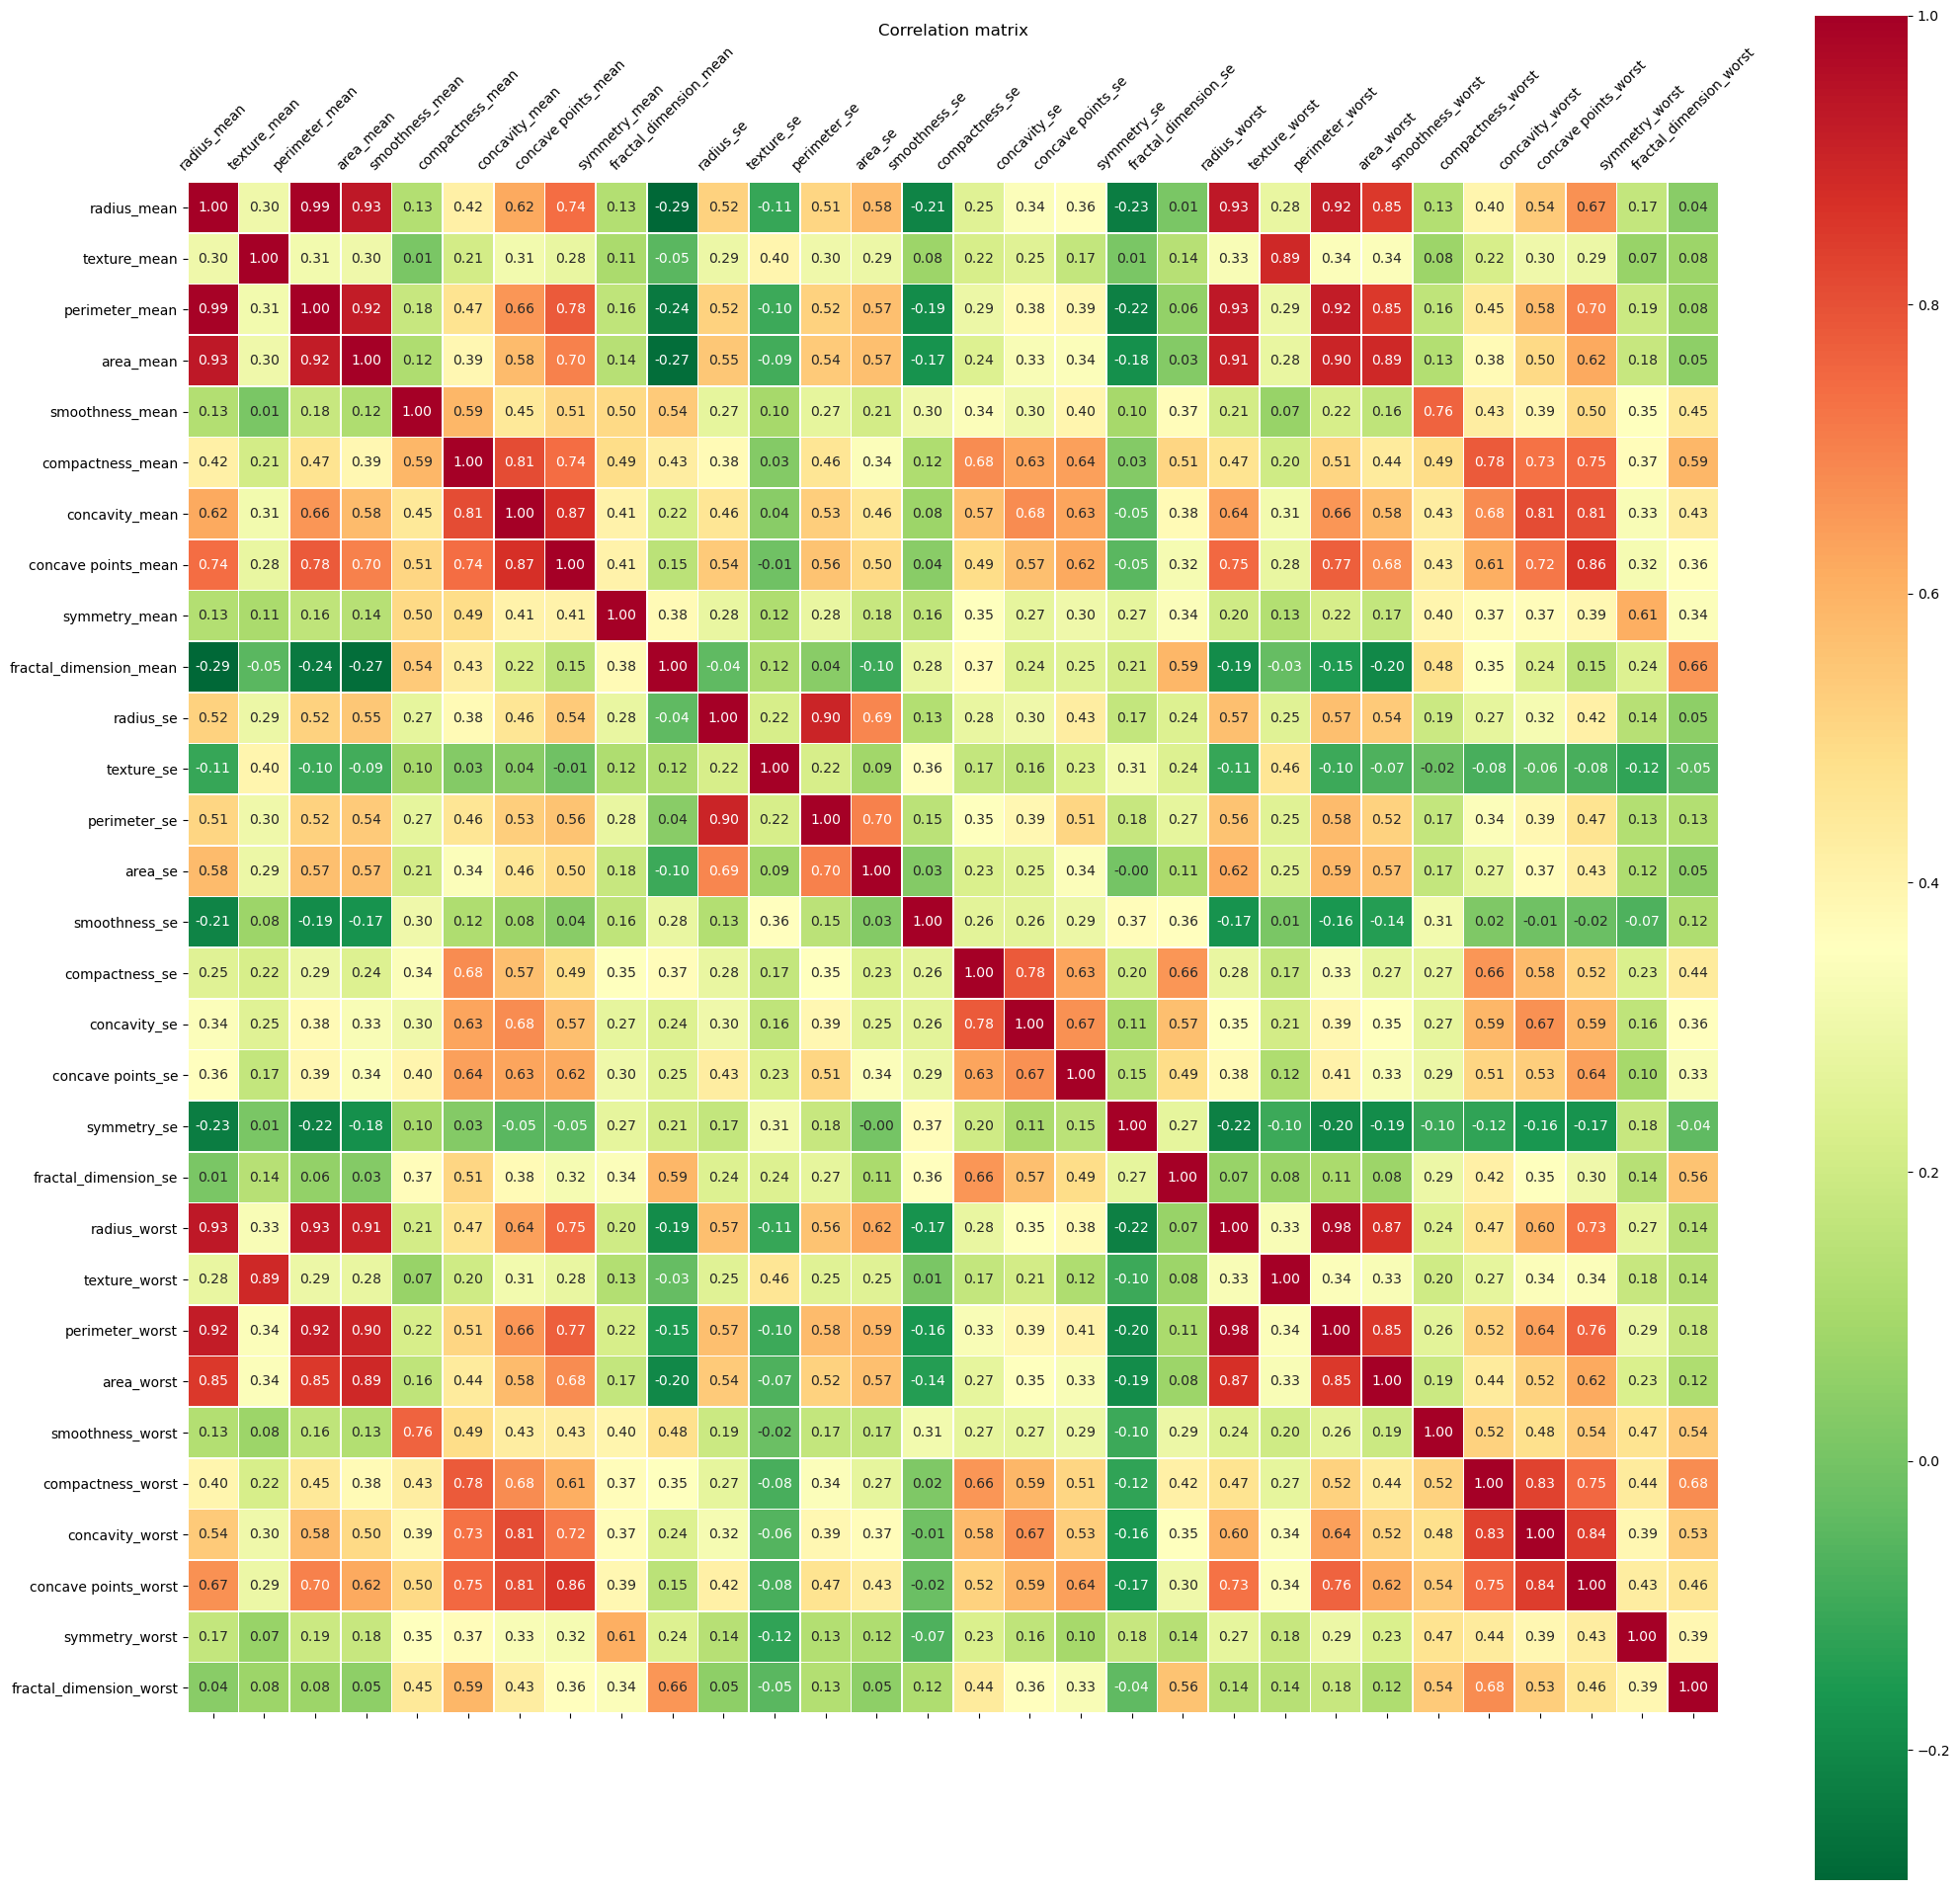

In [15]:
correlation = variables.corr('pearson')
plt.figure(figsize=(25,25), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation.round(2), cmap='RdYlGn_r', linewidths=0.5, annot=True,
                 cbar=True, square=True, fmt='0.2f')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation matrix')

<a id="8"></a> <br>
## Multicollinearity Problem
The correlation between some attributes, like radius_mean and perimeter_mean, is high and may cause the multicollinearity problem. To prevent this problem, between two highly correlated attributes, we can keep one and get rid of the other one. The below code shows those attributes that their correlation is more than 0.9.

In [16]:
'''''
# Observations and variables
observations_index = list(data.index)
variables_name = list(data.columns[1:])

for i in range(len(variables_name)):
    for j in range(len(variables_name)):
        if i != j & j > i:
            if correlation.iloc[i, j] > 0.9:
                print("{} and {} are {} correlated".format(variables_name[i], variables_name[j],
                                                           correlation.iloc[i, j].round(3)))
'''''

'\'\'\n# Observations and variables\nobservations_index = list(data.index)\nvariables_name = list(data.columns[1:])\n\nfor i in range(len(variables_name)):\n    for j in range(len(variables_name)):\n        if i != j & j > i:\n            if correlation.iloc[i, j] > 0.9:\n                print("{} and {} are {} correlated".format(variables_name[i], variables_name[j],\n                                                           correlation.iloc[i, j].round(3)))\n'

In the below code, among two highly correlated attributes, we kept one and get rid of the other.

In [17]:
# variables = variables.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'perimeter_se'], axis=1)

<a id="9"></a> <br>
## Label Encoding
Many ML algorithms cannot handle categorical variables without further manipulation. Therefore, as we mentioned earlier, one of the other tasks in the data preprocessing is label encoding. Label encoding can be easily seen as an approach to convert the categorical values into suitable numeric values in a way that computers can understand. Two of the frequently used approaches to encode the labels in python are called LabelEncoder and OneHotEncoder. While LabelEncoder considers one attribute for each unique category (class), OneHotEncoder assigns a unique integer to each category (class). The below image is retrieved from [here](https://miro.medium.com/max/875/0*T5jaa2othYfXZX9W.) and illustrates two different approaches very well. Although there might be some issues with OneHotEncoder in some problems, there is no difference to use which approach in our problem since it is a binary classification. With that being said, we used LabelEncoder in the below code.

In [18]:
# Label Encoding
labels_encoder_response = LabelEncoder()
labels = labels_encoder_response.fit_transform(labels)

<a id="10"></a> <br>
## PCA
In the ML area, data is the life-giving fuel of every model. Nowadays, we are dealing with some complex data, i.e. multi-dimensional data, which has lots of attributes and observations. In these kinds of data, there are too many variables to consider and it may affect the training of some ML models. Moreover, visualization and interpolation of these datasets are hard. To avoid these problems, it is better to use dimension reduction techniques before applying different ML models. Dimension reduction techniques reduce the feature space, so, it eases the processing time. Also, when we are dealing with fewer attributes, it is easier to make different plots and interpret them. There are many such techniques in the literature, but most of them fall in into two below categories:

1. **Feature selection**: In which we reduce the feature space dimension by eliminating some attributes.
2. **Feature extraction**: These techniques try to create new independent variables by combining old variables.

However, the first technique has a major disadvantage which is we may lose some information by dropping any attribute. 

PCA is a feature extraction technique in which we use a linear transformation of feature vectors into uncorrelated vectors. 

We note our data matrix by $X_{n*p}$, where $n$ is the number of observations, i.e. rows, and $p$ is the number of attributes, i.e. columns.
Assume we have centered our data matrix so that we make sure every attribute has a zero mean, and they contribute toward computing variance evenly. We call the centered or adjusted data matrix $Y_{n*p}$. Then we should compute the covariance matrix $C_{p*p}$ as follows:

\begin{equation} \label{cov_mat_1}
C = \frac{1}{n-1} Y^{\prime} Y
\end{equation}

In the next step, we use Eigen-decomposition to calculate the eigenvectors and eigenvalues of the covariance matrix as follow:

\begin{equation} \label{cov_mat_2}
C = A \Delta A^{\prime} = \sum_{j=1}^{p} \lambda_{j} a_{j} a^{\prime}_{j}
\end{equation},

where $A$ is a $p*p$ matrix of eigenvectors, $a_{j}$ is the $j^{\text{th}}$ eigenvector of $S$, and $\Delta_{j}$ is the $j^{\text{th}}$ eigenvalue.

Finally, we can project our $n*p$ dataset into the new dimension by computing $Z$ as follow:

\begin{equation} \label{cov_mat_3}
Z = Y A
\end{equation}

Where var($Z_{j}$) = $\lambda_{j}$ and corr($Z_{i}$, $Z_{j}$) = 0 if $i$ is not equal to $j$. But, NO WORRY!!! All of the above math is handled by the scikit learn library. The below code shows the implementation of the PCA algorithm in python using scikit learn library. It is also worthy to note that the PCA algorithm should be fitted only on the training data. Therefore, it is required to split data into training and test set before fitting this algorithm.

In [19]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(variables, labels, test_size=0.2, random_state=0)

# standardization
sc_training = StandardScaler()
X_train = sc_training.fit_transform(X_train)
X_test = sc_training.transform(X_test)

# Principal component analysis
pca = PCA()
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

To choose the number of Principal Components (PCs) to consider, we can take advantage of the explained variance. Explained variance is the proportion of variability accounted by each PC. As we mentioned before, the variance of the $i^{\text{th}}$ PC is equal to $\lambda_{i}$. Consequently, the amount of variance explained by the $i^{\text{th}}$ principal component is equal to:

\begin{equation} \label{Explained_Var_1}
L_{i} = \frac{\lambda_{i}}{\sum_{j=1}^{P}{\lambda_{j}}}
\end{equation}

Where P is the total number of attributes or PCs. After that, we can use the **elbow method** (similar to what we use in choosing the number of clusters in clustering) and scree plot to choose the best number of PCs.  **elbow** is the point that after which the distortion/inertia starts decreasing in a linear fashion.

Below code first, calculate eigenvalues and explained variance and then, plot both scree plot and Pareto plot. By looking at the scree plot, 6 PCs can be selected as the optimal number of the PCs and 79% of the variance is explained by the first six PCs.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


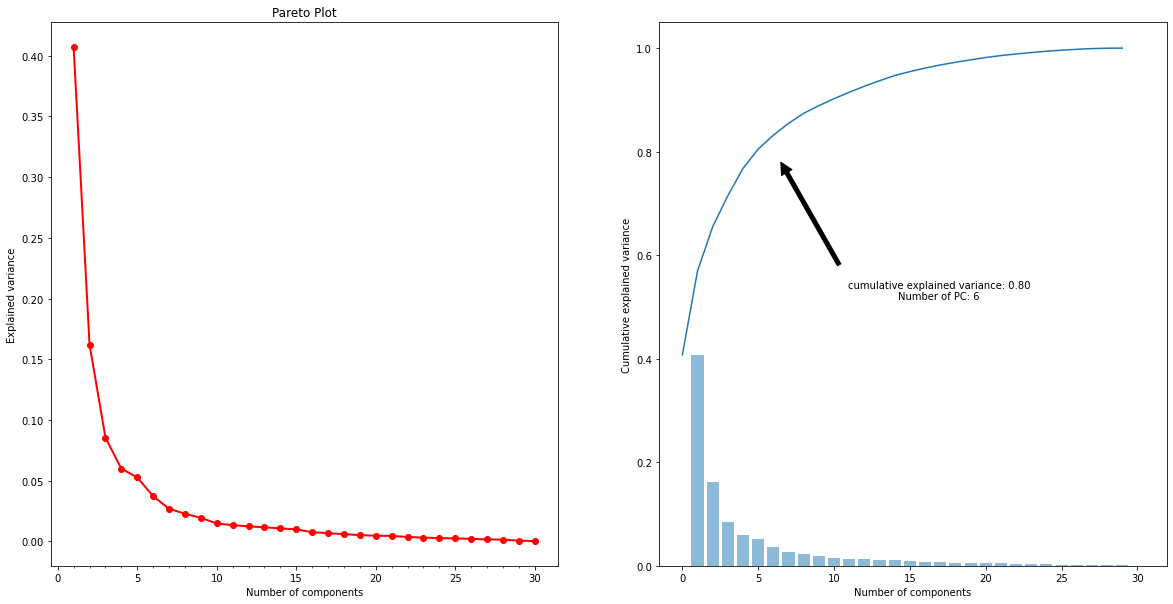

In [20]:
# Eigenvalues
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

ax1 = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
ax1.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
ax1.set_xticks(x, ["" + str(i) for i in x])
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance')
ax1.set_title('Scree Plot')

# Pareto plot
ax2 = plt.subplot(1, 2, 2)
ind = np.arange(1, len(ell) + 1)
ax2.bar(ind, ell, align='center', alpha=0.5)
ax2.plot(np.cumsum(ell))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')
ax1.set_title('Pareto Plot')

for x, y in zip(ind, np.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.79:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "Number of PC: " + str(x),  # this is the text
                     (x, y),  # this is the point to label
                     textcoords='figure fraction',  # how to position the text
                     xytext=(.8, 0.5),  # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  # horizontal alignment can be left, right or center
        NUMBER_OF_PCs = x # for further use
        break

In [21]:
Z_train = Z_train[:, :NUMBER_OF_PCs]
Z_test = Z_test[:, :NUMBER_OF_PCs]

<a id="11"></a> <br>
## Training Predictive Models
Now, data preprocessing is done and we can go for the next part which is training prediction models. Here, we used Logistic Regression, SVM, Artificial Neural Network, and two ensemble learning methods known as Random Forest and Max Voting. To get a relevant measure of bias and variance and compare different models more reliably, we have applied K-fold Cross-Validation for each model as well. It is worthy to note that each model's hyperparameters need to be tuned, but here, we have done hyperparameter tuning just for Random Forest and SVM. To tune the Random Forest hyperparameter, we tried different values for the number of trees in the forest between [1, 50], and choose the value which has the highest 10-fold Cross-Validated accuracy score. Also, for tuning SVM's hyperparameter, we have tried different configurations of the hyperparameters to get the best result.

The results of the different models will be saved in a variable called **Model_Score** to compare at the end.

<a id="12"></a> <br>
## Logistic Regression

In [22]:
Model_Score = []

# Logistic Regression
classifier_lr = LogisticRegression(random_state=0)
scores = cross_val_score(classifier_lr, Z_train, y_train, cv=10, scoring='accuracy')
lr_train_score_mean = scores.mean()
lr_train_score_std = scores.std()
classifier_lr.fit(Z_train, y_train)
model_name = 'Logistic Regression'
lr_test_score = classifier_lr.score(Z_test, y_test)

score = list((model_name, lr_train_score_mean.round(4), lr_train_score_std.round(4), lr_test_score.round(4)))
Model_Score.append(score)

We can also take a look at the confusion matrix of each model by running the below code.

In [23]:
# Making the confusion matrix
y_predicted_lr = classifier_lr.predict(Z_test)
cm_lr = confusion_matrix(y_test, y_predicted_lr)

print(cm_lr)

[[64  3]
 [ 1 46]]


<a id="12"></a> <br>
## Support Vector Classifier

In [24]:
# SVC
def svm(degree, kernel, gamma, x_train, x_test, train_label, test_label):
    if kernel == 'poly':
        support_vector_machine = SVC(kernel='poly', degree=degree, random_state=0)
        cv_score = cross_val_score(support_vector_machine, x_train, train_label, cv=10)
        svm_train_score_mean = cv_score.mean()
        svm_train_score_std = cv_score.std()
        support_vector_machine.fit(x_train, train_label)
        svm_test_score = support_vector_machine.score(x_test, test_label)
        name = 'SVM with ' + str(degree) + '-degree polynomial kernel'
    elif kernel == 'rbf':
        support_vector_machine = SVC(kernel='rbf', gamma=gamma, random_state=0)
        cv_score = cross_val_score(support_vector_machine, x_train, train_label, cv=10)
        svm_train_score_mean = cv_score.mean()
        svm_train_score_std = cv_score.std()
        support_vector_machine.fit(x_train, train_label)
        svm_test_score = support_vector_machine.score(x_test, test_label)
        name = 'SVM with rbf kernel and ' + str(gamma) + ' coefficient'
    else:
        support_vector_machine = SVC(kernel='sigmoid', gamma=gamma, random_state=0)
        cv_score = cross_val_score(support_vector_machine, x_train, train_label, cv=10)
        svm_train_score_mean = cv_score.mean()
        svm_train_score_std = cv_score.std()
        support_vector_machine.fit(x_train, train_label)
        svm_test_score = support_vector_machine.score(x_test, test_label)
        name = 'SVM with sigmoid kernel and ' + str(gamma) + ' coefficient'
    return support_vector_machine, list((name, svm_train_score_mean.round(4), svm_train_score_std.round(4),
                                         svm_test_score.round(4)))

svc_models = [
    [None, 'rbf', 'scale'], [None, 'rbf', 'auto'], [None, 'sigmoid', 'scale'], [None, 'sigmoid', 'auto'],
    [1, 'poly', None], [2, 'poly', None], [3, 'poly', 'None'], [4, 'poly', 'None'], [5, 'poly', 'None']
]

for i, x in enumerate(svc_models):
    _, score = svm(svc_models[i][0], svc_models[i][1], svc_models[i][2], Z_train, Z_test, y_train, y_test)
    Model_Score.append(score)

<a id="13"></a> <br>
## Random Forest

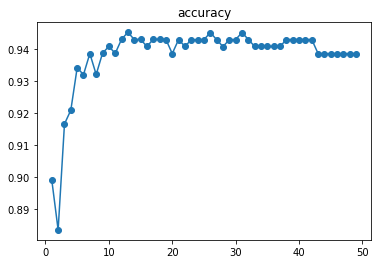

In [25]:
# Random Forest Classification
acc_score = []
std_score = []
max_rf_ne = 50
for ne in range(1, max_rf_ne):
    classifier_rf = RandomForestClassifier(n_estimators=ne, random_state=0)
    scores = cross_val_score(classifier_rf, Z_train, y_train, cv=10, scoring='accuracy')
    rf_train_score_mean = scores.mean()
    rf_train_score_std = scores.std()
    acc_score.append(rf_train_score_mean)
    std_score.append(rf_train_score_std)

best_rf_acc = max(acc_score)
best_rf_ne = acc_score.index(max(acc_score))

classifier_rf = RandomForestClassifier(n_estimators=best_rf_ne, random_state=0)
classifier_rf.fit(Z_train, y_train)
rf_test_score = classifier_rf.score(Z_test, y_test)

f, ax = plt.subplots()
ax.plot(range(1, max_rf_ne), acc_score, marker='o')
ax.set_title('accuracy')

model_name = 'Random Forest with ' + str(best_rf_ne) + ' estimators'

score = list((model_name, rf_train_score_mean.round(4), rf_train_score_std.round(4), rf_test_score.round(4)))
Model_Score.append(score)

<a id="14"></a> <br>
## ANN

In [26]:
# ANN
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=NUMBER_OF_PCs))
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier


classifier_ann = KerasClassifier(build_fn=build_classifier, batch_size=16, epochs=100, verbose=0)
accuracies = cross_val_score(estimator=classifier_ann, X=Z_train, y=y_train, cv=10)
ann_score = accuracies.mean()
ann_std = accuracies.std()

classifier_ann.fit(Z_train, y_train)
ann_test_score = classifier_ann.score(Z_test, y_test)

model_name = 'Two-hidden-layer ANN with 25 batch size and 100 epochs'
score = list((model_name, np.round(ann_score, 4), np.round(ann_std, 4), np.round(ann_test_score, 4)))
Model_Score.append(score)

<a id="15"></a> <br>
## Max Voting

In [27]:
# Max voting
def max_voting(estimators, x_train, x_test, train_label, test_label):
    mv_classifier = VotingClassifier(estimators=estimators, voting='hard')
    cv_score = cross_val_score(mv_classifier, x_train, train_label, cv=10)
    mv_train_score_mean = cv_score.mean()
    mv_train_score_std = cv_score.std()
    mv_classifier.fit(x_train, train_label)
    name = 'Max voting'  # Add the name of the base models (estimators)
    mv_test_score = mv_classifier.score(x_test, test_label)
    return mv_classifier, list((name, mv_train_score_mean.round(4), mv_train_score_std.round(4),
                                mv_test_score.round(4)))

model_1 = RandomForestClassifier(n_estimators=best_rf_ne)
model_2 = LogisticRegression(random_state=0)
model_3 = SVC(kernel='poly', degree=2)
model_4 = SVC(kernel='poly', degree=3)
model_5 = SVC(kernel='poly', degree=4)
model_6 = SVC(kernel='poly', degree=5)
model_7 = SVC(kernel='rbf', gamma='scale')
model_8 = SVC(kernel='rbf', gamma='auto')
model_9 = SVC(kernel='sigmoid', gamma='scale')
model_10 = SVC(kernel='sigmoid', gamma='auto')

# version 10
classifier_mv, score = max_voting([('rf', model_1), ('lr', model_2), ('SVM_2', model_3), ('SVM_3', model_4),
                                   ('SVM_4', model_5), ('SVM_5', model_6), ('SVM_rbf_scale', model_7),
                                   ('SVM_rbf_auto', model_8), ('SVM_sigmoid_scale', model_9),
                                   ('SVM_sigmoid_auto', model_10)], Z_train, Z_test, y_train, y_test)

Model_Score.append(score)

<a id="16"></a> <br>
## Results

In [28]:
# Results
Model_Score = pd.DataFrame(Model_Score, columns=['Model', 'Train Score Average', 'Train Score SD', 'Test Score'])
Model_Score = Model_Score.sort_values(by=['Test Score'], ascending=False)

In [29]:
Model_Score

,Model,Train Score Average,Train Score SD,Test Score
2,SVM with rbf kernel and auto coefficient,0.9563,0.0291,0.9737
0,Logistic Regression,0.9561,0.0240,0.9649
5,SVM with 1-degree polynomial kernel,0.9606,0.0273,0.9649
1,SVM with rbf kernel and scale coefficient,0.9541,0.0329,0.9561
7,SVM with 3-degree polynomial kernel,0.9298,0.0362,0.9561
11,Two-hidden-layer ANN with 25 batch size and 10...,0.9583,0.0332,0.9561
12,Max voting,0.9518,0.0288,0.9474
3,SVM with sigmoid kernel and scale coefficient,0.9386,0.0322,0.9298
9,SVM with 5-degree polynomial kernel,0.8838,0.0444,0.9123
10,Random Forest with 12 estimators,0.9386,0.0362,0.9123


The final results are acceptable. Generally, the difference between train and test results could be due to overfitting, lack of data, and so on. However, in our case, this difference is because of using PCA in a small dataset. Remember that our chosen number of PCs explains near 79% of the variance and this could have an effect in training ML models on the small datasets. As I mentioned at the beginning of this notebook, **we want to use PCA just for practice here **. 

In [30]:
''''' #TO DO 
parameters = {'C':[1, 10, 100]}
svc = SVC(kernel='poly', degree=3, random_state=0)
clf = GridSearchCV(svc, parameters)
clf.fit(Z_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(Z_test)
print(classification_report(y_true, y_pred))
print()
'''''

'\'\' #TO DO \nparameters = {\'C\':[1, 10, 100]}\nsvc = SVC(kernel=\'poly\', degree=3, random_state=0)\nclf = GridSearchCV(svc, parameters)\nclf.fit(Z_train, y_train)\n\nprint("Best parameters set found on development set:")\nprint()\nprint(clf.best_params_)\nprint()\nprint("Grid scores on development set:")\nprint()\nmeans = clf.cv_results_[\'mean_test_score\']\nstds = clf.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n          % (mean, std * 2, params))\nprint()\n\nprint("Detailed classification report:")\nprint()\nprint("The model is trained on the full development set.")\nprint("The scores are computed on the full evaluation set.")\nprint()\ny_true, y_pred = y_test, clf.predict(Z_test)\nprint(classification_report(y_true, y_pred))\nprint()\n'